# Introduzione alla Probabilità e Statistica
In questo notebook esploreremo alcuni dei concetti che abbiamo discusso in precedenza. Molti concetti di probabilità e statistica sono ben rappresentati nelle principali librerie per l'elaborazione dei dati in Python, come `numpy` e `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Variabili casuali e distribuzioni
Iniziamo estraendo un campione di 30 valori da una distribuzione uniforme da 0 a 9. Calcoleremo anche la media e la varianza.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Per stimare visivamente quanti valori diversi ci sono nel campione, possiamo tracciare l'**istogramma**:


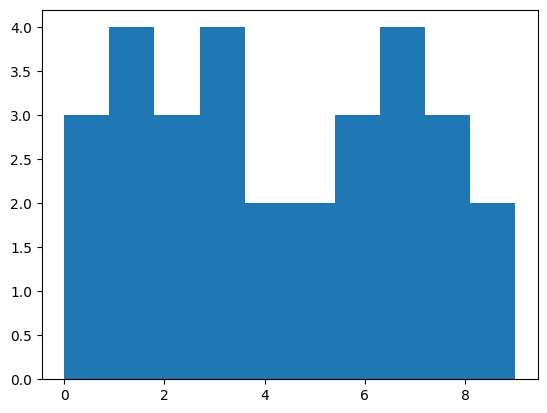

In [119]:
plt.hist(sample)
plt.show()

## Analizzare Dati Reali

La media e la varianza sono molto importanti quando si analizzano dati del mondo reale. Carichiamo i dati sui giocatori di baseball da [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


Stiamo utilizzando un pacchetto chiamato [**Pandas**](https://pandas.pydata.org/) qui per l'analisi dei dati. Parleremo più approfonditamente di Pandas e del lavoro con i dati in Python più avanti in questo corso.

Calcoliamo i valori medi per età, altezza e peso:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Ora concentriamoci sull'altezza e calcoliamo la deviazione standard e la varianza:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Oltre alla media, ha senso considerare il valore mediano e i quartili. Possono essere visualizzati utilizzando un **box plot**:


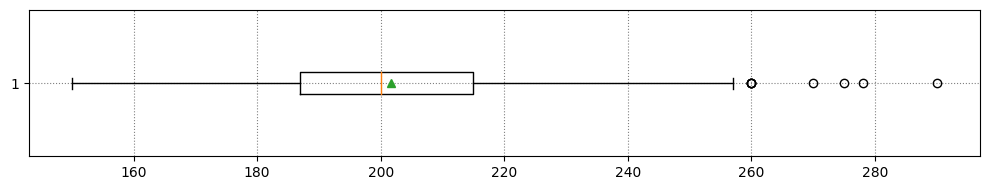

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Possiamo anche creare box plot di sottoinsiemi del nostro dataset, ad esempio raggruppati per ruolo del giocatore.


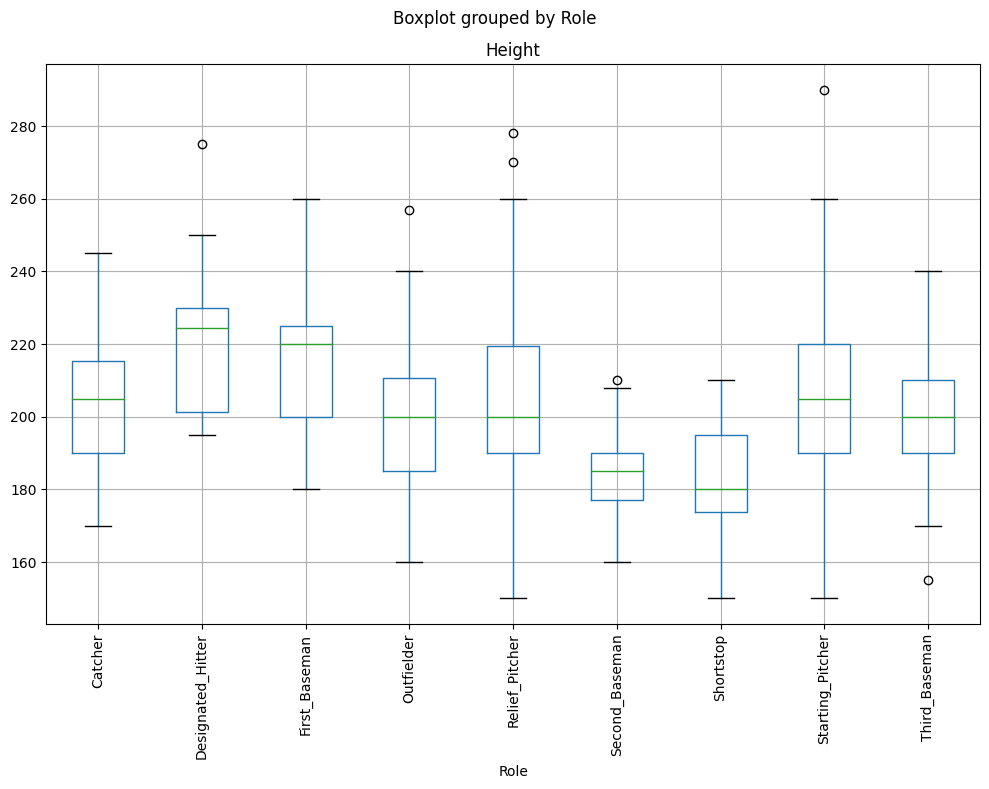

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Nota**: Questo diagramma suggerisce che, in media, l'altezza dei primi base è maggiore rispetto a quella dei secondi base. Più avanti impareremo come testare formalmente questa ipotesi e come dimostrare che i nostri dati sono statisticamente significativi per supportarla.

Età, altezza e peso sono tutte variabili casuali continue. Quale pensi che sia la loro distribuzione? Un buon modo per scoprirlo è tracciare l'istogramma dei valori:


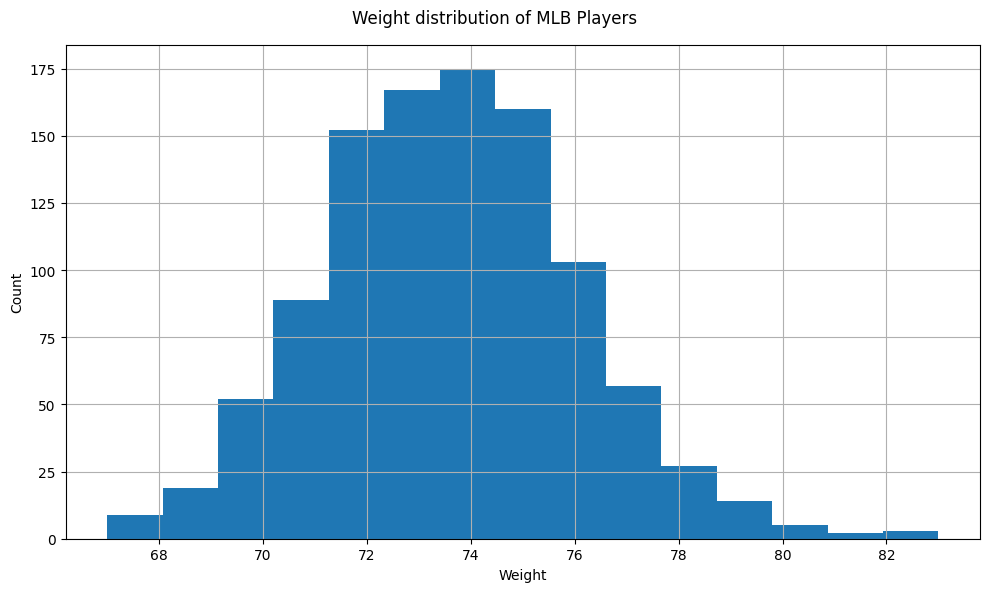

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Distribuzione Normale

Creiamo un campione artificiale di pesi che segue una distribuzione normale con la stessa media e varianza dei nostri dati reali:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

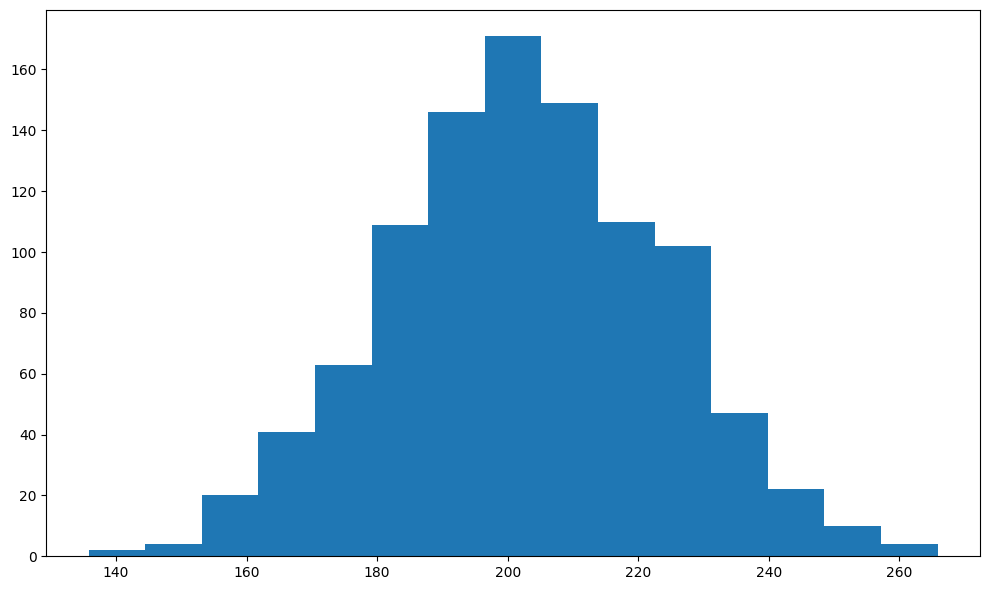

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

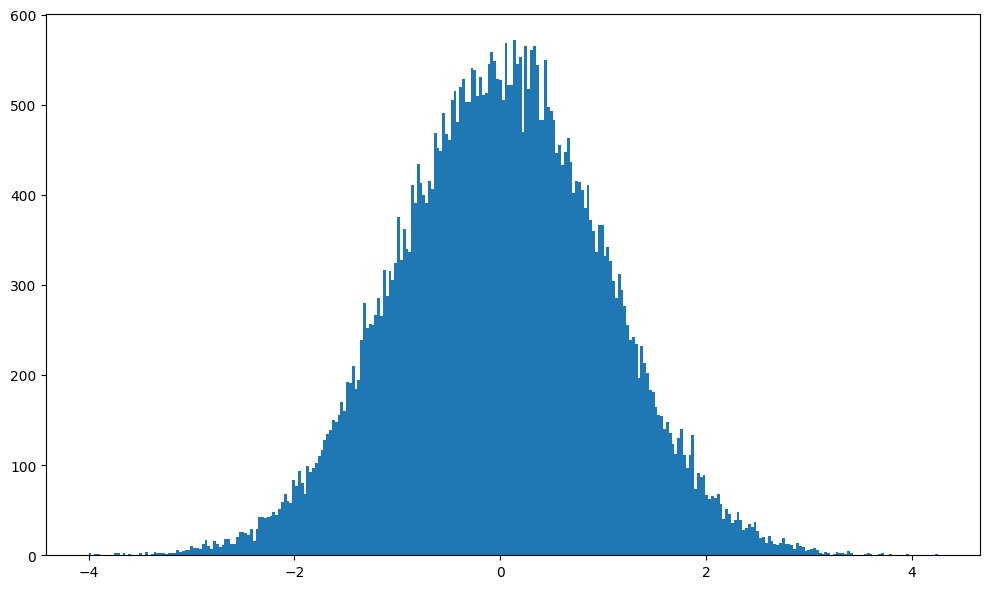

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Poiché la maggior parte dei valori nella vita reale sono distribuiti normalmente, non dovremmo utilizzare un generatore di numeri casuali uniformi per generare dati di esempio. Ecco cosa succede se proviamo a generare pesi con una distribuzione uniforme (generata da `np.random.rand`):


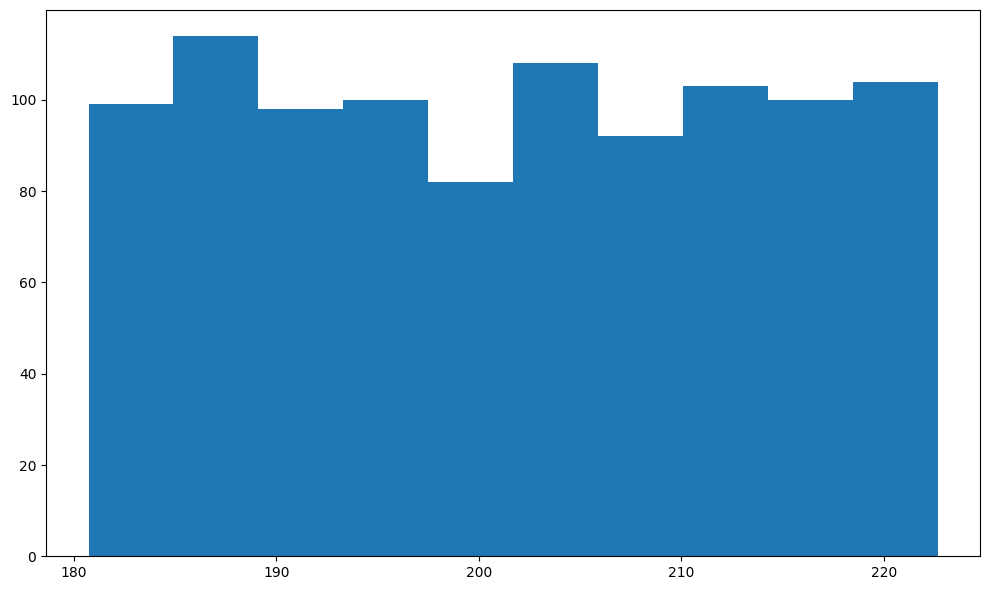

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Intervalli di Confidenza

Calcoliamo ora gli intervalli di confidenza per i pesi e le altezze dei giocatori di baseball. Utilizzeremo il codice [da questa discussione su stackoverflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Test delle ipotesi

Esploriamo i diversi ruoli nel nostro dataset di giocatori di baseball:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Possiamo vedere che gli intervalli non si sovrappongono.

Un modo statisticamente più corretto per dimostrare l'ipotesi è utilizzare un **test t di Student**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


I due valori restituiti dalla funzione `ttest_ind` sono:  
* Il p-value può essere considerato come la probabilità che due distribuzioni abbiano la stessa media. Nel nostro caso, è molto basso, il che significa che ci sono forti evidenze a supporto del fatto che i primi basi siano più alti.  
* Il t-value è il valore intermedio della differenza media normalizzata utilizzato nel t-test, ed è confrontato con un valore soglia per un determinato livello di confidenza.  


## Simulare una Distribuzione Normale con il Teorema del Limite Centrale

Il generatore pseudo-casuale in Python è progettato per fornirci una distribuzione uniforme. Se vogliamo creare un generatore per la distribuzione normale, possiamo utilizzare il teorema del limite centrale. Per ottenere un valore distribuito normalmente, calcoleremo semplicemente la media di un campione generato uniformemente.


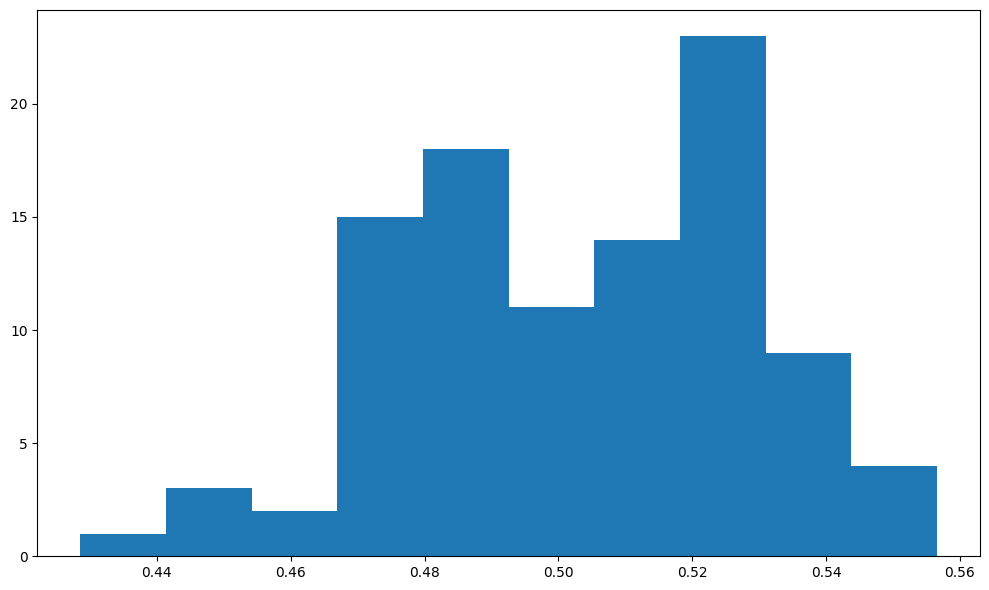

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Correlazione e Malvagia Corporazione di Baseball

La correlazione ci permette di trovare relazioni tra sequenze di dati. Nel nostro esempio, immaginiamo che esista una malvagia corporazione di baseball che paga i suoi giocatori in base alla loro altezza - più alto è il giocatore, più soldi riceve. Supponiamo che ci sia uno stipendio base di $1000, e un bonus aggiuntivo da $0 a $100, a seconda dell'altezza. Prenderemo i veri giocatori della MLB e calcoleremo i loro stipendi immaginari:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Calcoliamo ora la covarianza e la correlazione di queste sequenze. `np.cov` ci fornirà una cosiddetta **matrice di covarianza**, che è un'estensione della covarianza a più variabili. L'elemento $M_{ij}$ della matrice di covarianza $M$ è una correlazione tra le variabili di input $X_i$ e $X_j$, e i valori diagonali $M_{ii}$ rappresentano la varianza di $X_{i}$. Allo stesso modo, `np.corrcoef` ci fornirà la **matrice di correlazione**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


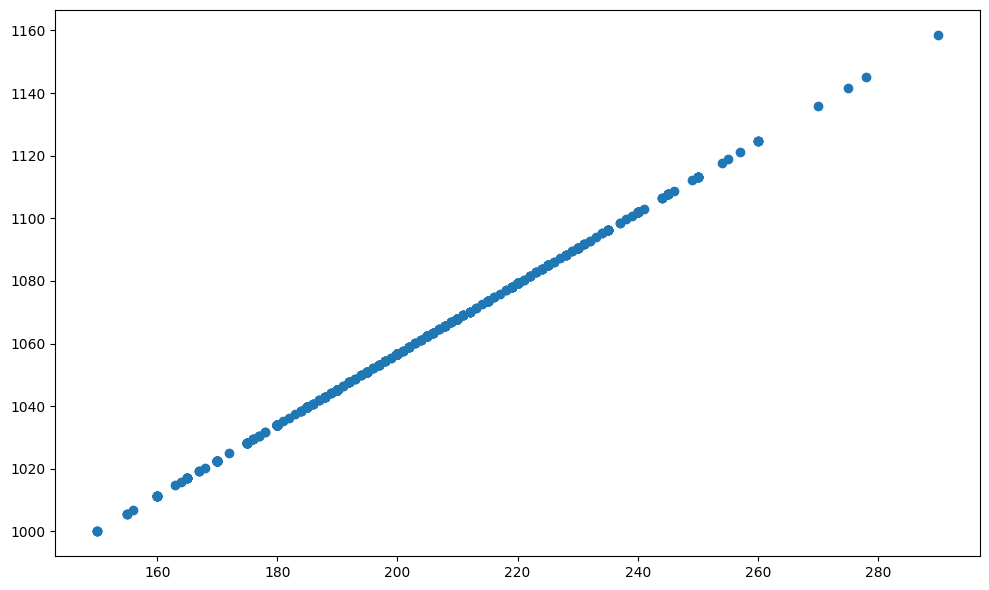

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


In questo caso, la correlazione è leggermente più bassa, ma è comunque piuttosto alta. Ora, per rendere la relazione ancora meno evidente, potremmo voler aggiungere un po' di casualità in più aggiungendo una variabile casuale allo stipendio. Vediamo cosa succede:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


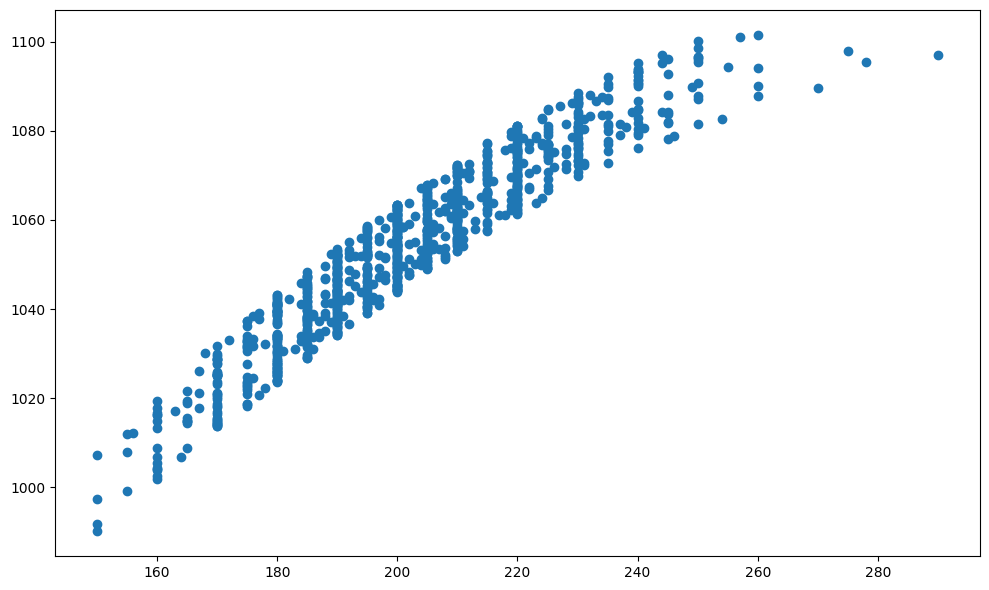

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Riesci a indovinare perché i punti si allineano in linee verticali in questo modo?

Abbiamo osservato la correlazione tra un concetto artificialmente costruito come lo stipendio e la variabile osservata *altezza*. Vediamo anche se le due variabili osservate, come altezza e peso, sono correlate tra loro:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Purtroppo, non abbiamo ottenuto alcun risultato - solo alcuni strani valori `nan`. Questo è dovuto al fatto che alcuni dei valori nella nostra serie sono indefiniti, rappresentati come `nan`, il che rende il risultato dell'operazione anch'esso indefinito. Osservando la matrice, possiamo vedere che la colonna problematica è `Weight`, perché l'autocorrelazione tra i valori di `Height` è stata calcolata.

> Questo esempio mostra l'importanza della **preparazione** e della **pulizia** dei dati. Senza dati adeguati non possiamo calcolare nulla.

Utilizziamo il metodo `fillna` per riempire i valori mancanti e calcoliamo la correlazione:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

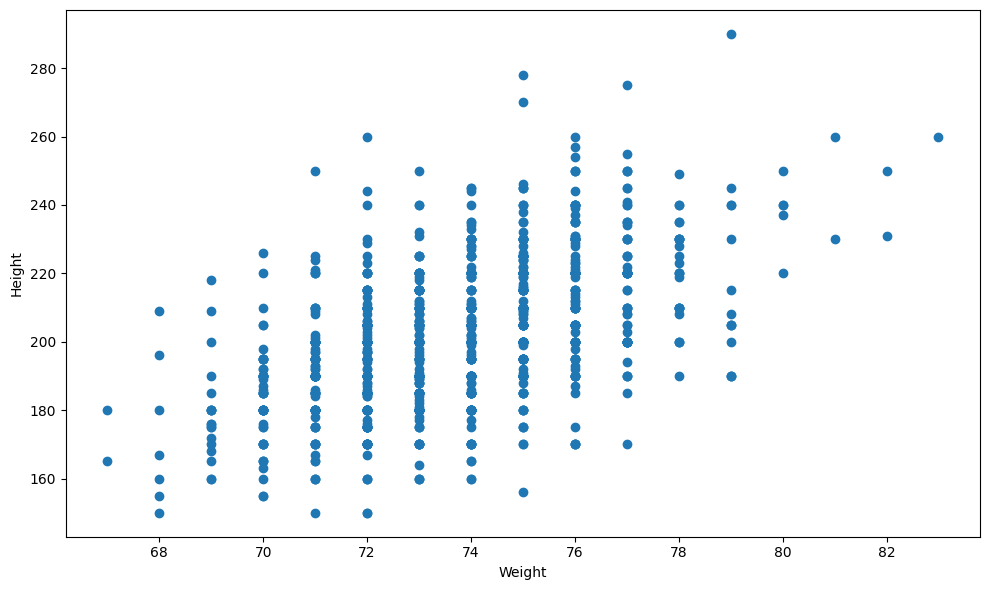

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Conclusione

In questo notebook abbiamo imparato come eseguire operazioni di base sui dati per calcolare funzioni statistiche. Ora sappiamo come utilizzare un solido apparato di matematica e statistica per verificare alcune ipotesi e come calcolare intervalli di confidenza per variabili arbitrarie a partire da un campione di dati.



---

**Disclaimer**:  
Questo documento è stato tradotto utilizzando il servizio di traduzione automatica [Co-op Translator](https://github.com/Azure/co-op-translator). Sebbene ci impegniamo per garantire l'accuratezza, si prega di notare che le traduzioni automatiche potrebbero contenere errori o imprecisioni. Il documento originale nella sua lingua nativa dovrebbe essere considerato la fonte autorevole. Per informazioni critiche, si raccomanda una traduzione professionale eseguita da un traduttore umano. Non siamo responsabili per eventuali fraintendimenti o interpretazioni errate derivanti dall'uso di questa traduzione.
